In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import rmgpy.constants as constants

In [2]:
# Set filename
filename = "trajectories_4.txt"

filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_too_small_step.txt"
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_too_large_step.txt"
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_just_right_stepsize.txt"

filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_0.txt"
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_1.txt"
# Fixed step_scale bug: NVM undid work from above that was correct !!!!
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_2.txt"
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_3.txt"
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_5.txt" # Res=15º
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_6.txt" # Res=20º
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_7.txt" # Res=15º

filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_11.txt" # Res=15º
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_12.txt" # Res=20º
filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_trajectories_13.txt" # Res=30º
#filename = "/Users/lancebettinson/scratch/nuts_out/propanoic_hf_just_right_stepsize.txt"
# Open file and populate data structure
phi = []
E = []
grad = []
with open(filename,'r') as f:
    line = f.readline()
    line = f.readline()
    while line:
        split = line.split('\t')
        phi_ = split[0].strip('\\[').strip('\\]').split(' ')
        while '' in phi_:
            phi_.remove('')
        phi.append([float(p) for p in phi_])
        #phi.append(np.array(split[0]))
        E.append(float(split[1]))
        line = f.readline()
    f.close()
    # Convert to degrees
phi = np.array(phi)
phi = phi*180/np.pi

<IPython.core.display.Javascript object>


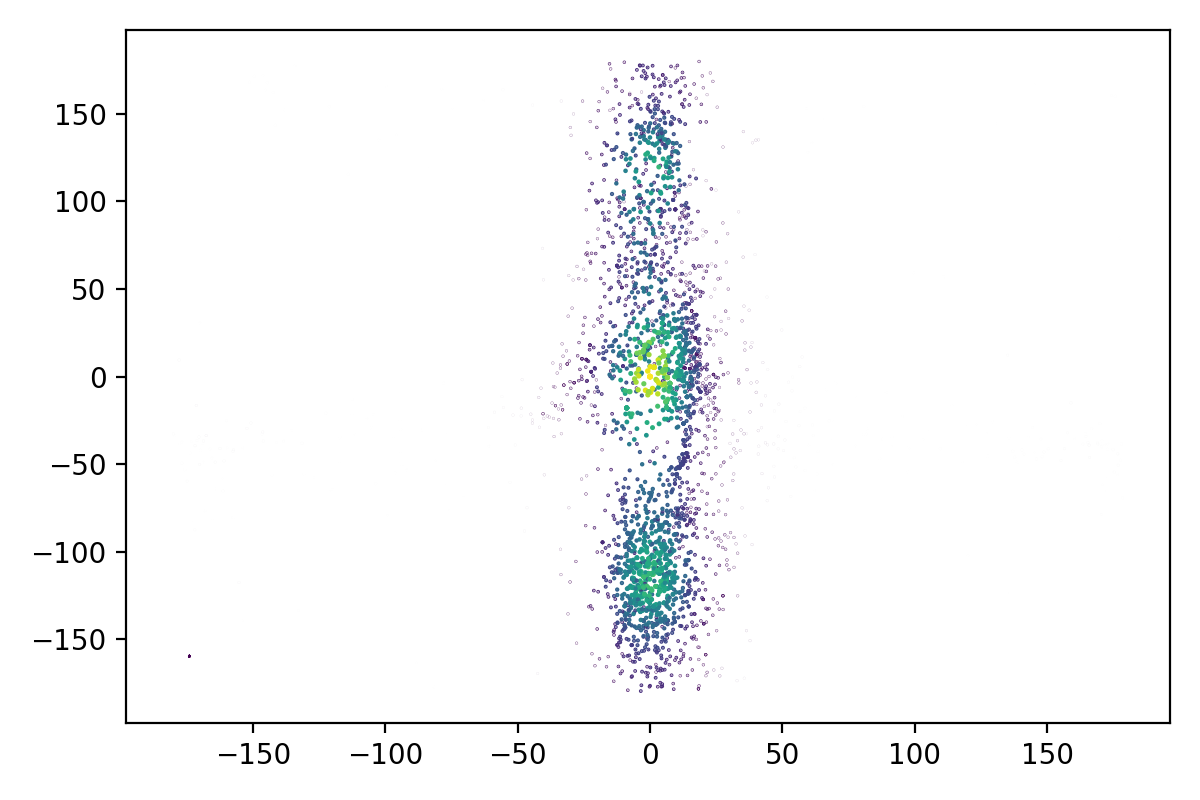

In [7]:
%matplotlib notebook
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
show_last = len(phi)
show_first = len(phi)
# Plot all position vals
# Get colors from coolwarm colormap
colors = plt.get_cmap('cividis', show_last)
beta = 1/(constants.kB*400)*constants.E_h
scats = []
#area = [(100*E[i])**3 for i in range(len(phi))]
area = [1E5*np.exp(-beta*E[i]) for i in range(len(phi))]
area = [1*np.exp(-beta*E[i]) for i in range(len(phi))]
color = [1E3*np.exp(-beta*E[i]) for i in range(len(phi))]
ax.scatter(phi[-show_last:show_first,2],
           phi[-show_last:show_first,1],
           s=area[-show_last:show_first],
           c=color[-show_last:show_first],
           alpha=1.)
#for i,p in enumerate(phi):
#    ax.scatter(p[1],p[2],color=colors(i))
    #scats.append(ax.scatter(x=p[0],y=p[1],color=colors(i)))
#ax.plot(phi[:,0],phi[:,1],color='gray')
plt.show()
plt.tight_layout()

In [249]:
import cantera
cantera.__path__

['/Users/lancebettinson/miniconda2/envs/rmg_env/lib/python3.7/site-packages/cantera']